## 1- Load our data file

### Setup initial libraries

In [1]:
import pandas as pd

### Import dataset

In [2]:
df= pd.read_csv("CC GENERAL.csv", delimiter= ",")

### Show the head of the dataset

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Finding the number of missing values on each column

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We have some Nan values to impute there.

### Drop "CREDIT_LIMIT" missing value

In [5]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

We have seen that credit limit feature has just 1 record here that has a missing value. So we don't have to take the trouble to impute it. We can simply drop it and never think about it again.

### Replacing "MINIMUM_PAYMENTS" missing values

In [6]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

## 2- Clustering Preprocessing

### Drop "CUST_ID" column

In [7]:
data=df.drop("CUST_ID", axis=1)

### Normalizing and reducing the dimensions of the data

In [8]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [9]:
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

## 3- Hierarchical Clustering

### Importing our clustering algorithm: Agglomerative

In [10]:
from sklearn.cluster import AgglomerativeClustering

### Applying Agglomerative Algorithm

In [11]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)

### Agglomerative Labels

In [12]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,2
2,0
3,1
4,1
...,...
8944,0
8945,0
8946,1
8947,1


## 4- Agglomerative Cluster Plot 

In [13]:
import matplotlib.pyplot as plt

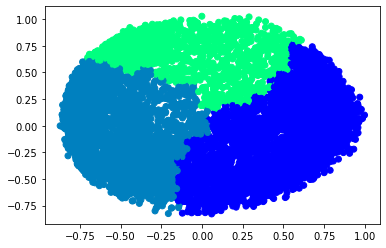

In [14]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## 5- Dendrogram Plot

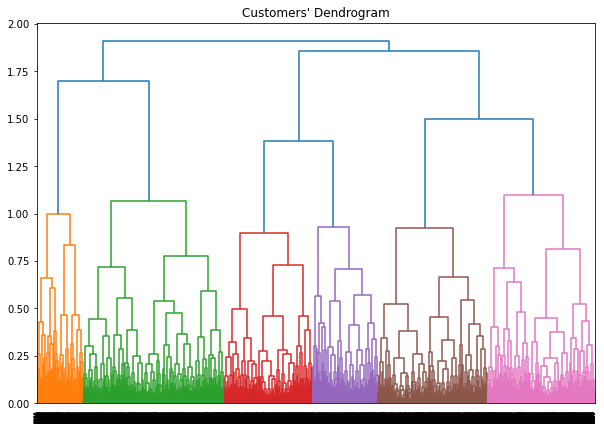

In [15]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customers' Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))

## 6- K-Means Clustering

### Importing our clustering algorithm: K-Means

In [16]:
from sklearn.cluster import KMeans

### Applying K-Means

In [17]:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=4, random_state=0)

### K-Means Labels

In [18]:
labels=kmeans.labels_
labels

array([1, 2, 0, ..., 3, 1, 3])

The output of this step is a "cluster" variable, which contains the cluster number for each record/row of the dataset. Let us add this variable at the end of the dataframe.

In [19]:
clusters = pd.concat([data, pd.DataFrame({"cluster":labels})], axis=1)

In order to visualize the clusters created and see if they’re well-defined, we need to reduce the dimensionality of the data since it’s difficult to visualize n-dimensional data in 2 dimensional space. However, while reducing the dimensionality of the data, we want to make sure that we capture as many features of the original dataset as possible. For this, we use Principal Component Analysis (PCA). 

In [20]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

(8949, 2)


In [21]:
final_data = pd.DataFrame({"x": x, "y":y, "label":labels})
groups = final_data.groupby(labels)

### K-Means Centroids

In [22]:
kmeans.predict(X_principal)
print(kmeans.cluster_centers_) 

[[ 0.56666908  0.33643275]
 [-0.47839017 -0.29216289]
 [-0.44338713  0.51627687]
 [ 0.42055341 -0.31795151]]


## 7- K-best Value

In [23]:
sum_of_squared_distances = []
K= range (1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(final_data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)

[15140.017046581519, 6297.923623867847, 2731.0338358878985, 927.8003007916678, 790.1304379731856, 679.2882255942545, 572.3317126442508, 470.148474148801, 426.51789645766434, 387.7760924652387, 344.75696627235243, 312.837765477225, 291.82548513082423, 261.37642444502086]


### The Elbow Method

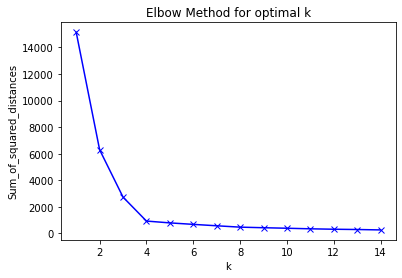

In [24]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method for optimal k")
plt.show()

It seems like the elbow is around 3 or 4 .

## 8- K-Means Plot

Finally, we plot all the clusters as various subplots inside a single plot.

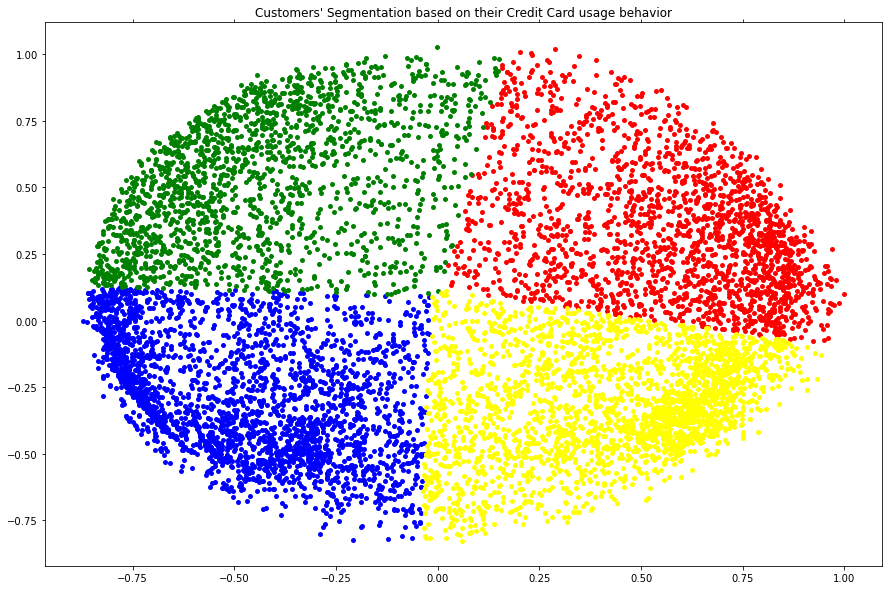

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("Customers' Segmentation based on their Credit Card usage behavior")
plt.show()

Both clustering algorithms did a great job finding the clusters but K-Means seems to be doing a greater job in distinguishing between clusters. Clusters seem closer to each others and less distinguishable in hierarchical clustering.
It is clear that:
- people represented in green spend a lot while they have low balance.
- people represented in red have a low balance and spend less than others
- people represented in blue have high balance and purchase a lot
- people represented in yellow don't purchase much, although they have lots of money

## Other Validation Metrics

In [26]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

- The Davis-Bouldin Index is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.
- The Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.

### For Hierarchical Clustering

In [27]:
print(f'Davies-Bouldin index = {davies_bouldin_score(X_principal, labels)}')
print(f'Silhouette Score = {silhouette_score(X_principal, labels)}')

Davies-Bouldin index = 0.8103392478741063
Silhouette Score = 0.42646079411562493


### For K-Means

In [28]:
print(f'Davies-Bouldin index = {davies_bouldin_score(final_data, labels)}')
print(f'Silhouette Score = {silhouette_score(final_data, labels)}')

Davies-Bouldin index = 0.4233968127891365
Silhouette Score = 0.7231973563892397


According to Davis-Bouldin Index and Silhouette Score, K-Means results are far better than hierarchical clustering results.